<a href="https://colab.research.google.com/github/subodh2708/deep-learning---tensorflow-2.0/blob/main/10_time_series_forecasting_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forcasting fundamentals with tensorflow + milestone project 3: BitPredict💹💰

## Get Data 

In [52]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-09-28 04:52:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.002s  

2022-09-28 04:52:44 (71.3 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



## Importing time-series with pandas

In [53]:
import pandas as pd

df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates = ['Date'],
                 index_col = ['Date'])

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [54]:
bitcoin_price = pd.DataFrame(df['Closing Price (USD)']).rename(columns= {'Closing Price (USD)':'price'})
bitcoin_price

,price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


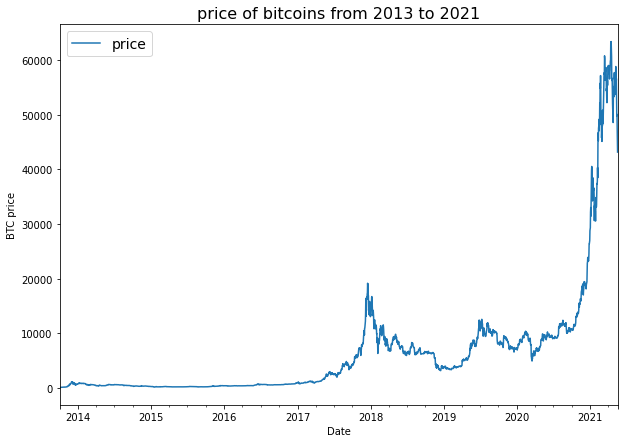

In [55]:
import matplotlib.pyplot as plt

bitcoin_price.plot(figsize = (10,7))
plt.ylabel('BTC price')
plt.title('price of bitcoins from 2013 to 2021', fontsize= 16)
plt.legend(fontsize= 14)


## importing time series data with python CSV module

In [56]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter= ',')
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], '%Y-%m-%d'))
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'date')

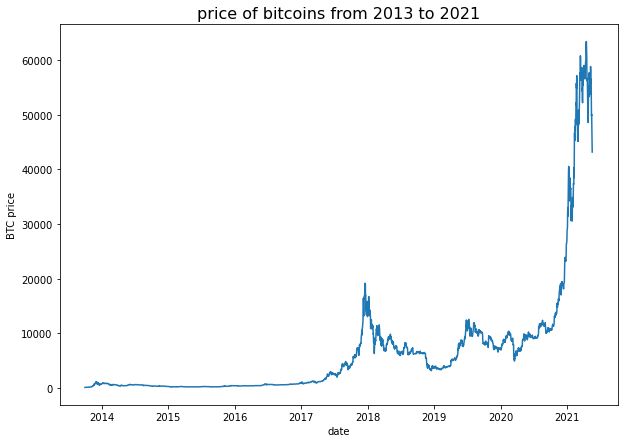

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10,7))
plt.plot(timesteps, btc_price)
plt.ylabel('BTC price')
plt.title('price of bitcoins from 2013 to 2021', fontsize= 16)
plt.xlabel('date')

## Format data part 1: create train and test set of our time series data

### creating train and test sets with time series data( the wrong way)

In [58]:
timesteps = bitcoin_price.index.to_numpy()
prices = bitcoin_price['price'].to_numpy()

timesteps[:10] , prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( timesteps, prices, test_size=0.2, random_state=42)

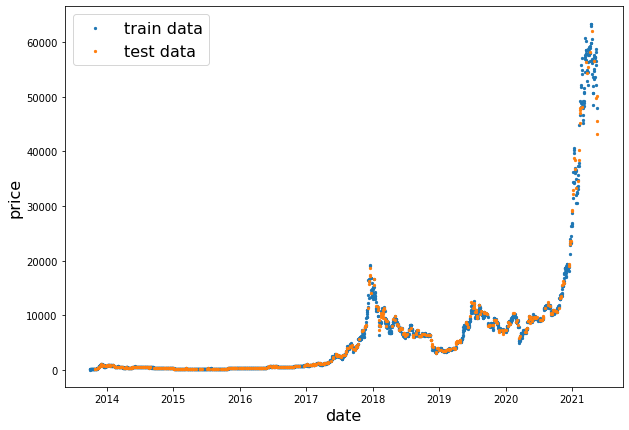

In [60]:
plt.figure(figsize= (10,7))
plt.scatter(X_train, y_train, s= 5, label = 'train data')
plt.scatter(X_test, y_test, s= 5, label= 'test data')
plt.xlabel('date', fontsize = 16)
plt.ylabel('price', fontsize= 16)
plt.legend(fontsize=16)

## Create train and test set for time series dataset ( the right way)

In [61]:
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size] , prices[:split_size]

X_test, y_test = timesteps[split_size:] , prices[split_size:]



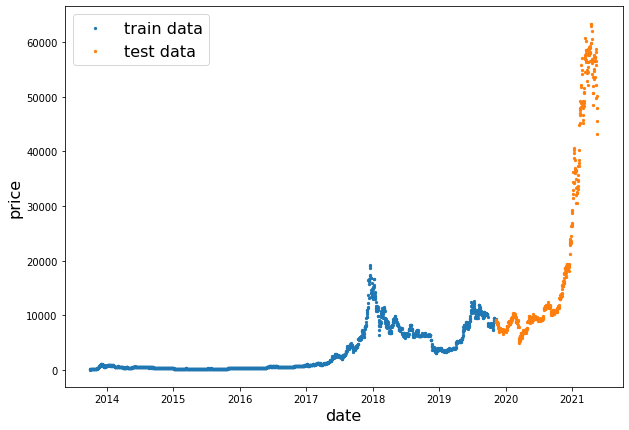

In [62]:
plt.figure(figsize =(10,7))
plt.scatter(X_train, y_train, s= 5, label = 'train data')
plt.scatter(X_test, y_test, s= 5, label= 'test data')
plt.xlabel('date', fontsize = 16)
plt.ylabel('price', fontsize= 16)
plt.legend(fontsize=16)

## Create a ploting function

In [63]:
def plot_time_series(timesteps, values, format = '.', start = 0 , end = None , label= None):

  plt.plot(timesteps[start:end],values[start:end], format, label = label)
  plt.xlabel('Time')
  plt.ylabel('BTC Price')
  if label:
    plt.legend(fontsize= 16)

  plt.grid(True)

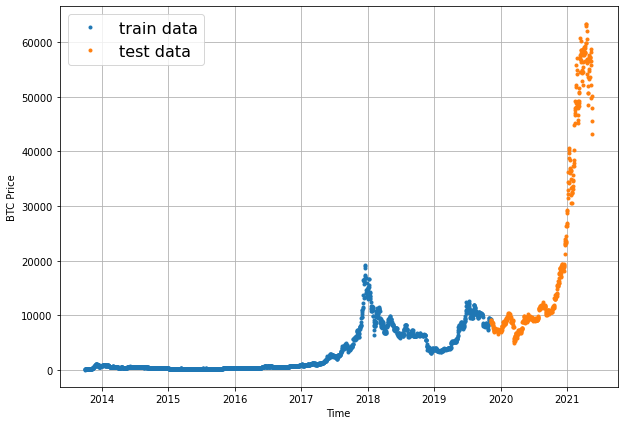

In [64]:
plt.figure(figsize = (10,7))
plot_time_series(timesteps = X_train , values = y_train , label= 'train data')
plot_time_series(X_test, y_test , label= 'test data')

## modelling experiment

### model 0: Naive Forecast(baseline)

In [65]:
naive_forecast = y_test[:-1]

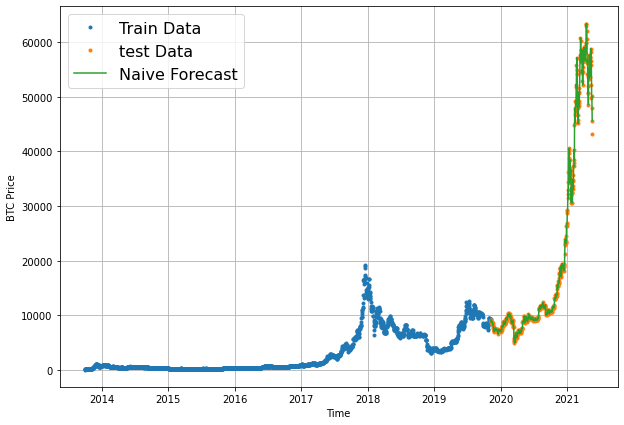

In [66]:
plt.figure(figsize= (10,7))
plot_time_series(X_train,y_train, label= 'Train Data')
plot_time_series(X_test , y_test, label= 'test Data')
plot_time_series(timesteps = X_test[1:], values = naive_forecast, format= '-', label= 'Naive Forecast')

## Evaluating the time series model

In [67]:
import tensorflow as tf

In [68]:
def mean_absolute_scaled_error(y_true,y_pred):
  mae= tf.reduce_mean(tf.abs(y_true - y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae/mae_naive_no_season

In [69]:
mean_absolute_scaled_error(y_true = y_test[1:], y_pred = naive_forecast).numpy()

0.9995699939182624

In [70]:
def evaluate_preds(y_true,y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype= tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mae)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)

  return{'mae':mae.numpy(),
         'mse':mse.numpy(),
         'rmse':rmse.numpy(),
         'mape':mape.numpy(),
         'mase': mase.numpy()}

In [71]:
naive_results = evaluate_preds(y_true = y_test[1:],
                               y_pred= naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 23.832336,
 'mape': 2.516525,
 'mase': 0.99957}

In [72]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [73]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

In [74]:
tf.reduce_max(y_test), tf.reduce_min(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>,
 <tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>)

## Format data part 2: Windowing the dataset

In [75]:
print(f'we want to use this {btc_price[:7]} to predict this {btc_price[7]}')

we want to use this [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this 123.033


In [76]:
HORIZON = 1
WINDOW_SIZE = 7

In [77]:
def get_labelled_windows(x, horizon=HORIZON):

  return x[:, :-horizon], x[:, -horizon:]


In [78]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8) +1, axis=0))
print(f' window: {tf.squeeze(test_window)} -->  label: {tf.squeeze(test_label)}') 

 window: [1 2 3 4 5 6 7] -->  label: 8


In [79]:
import numpy as np

def make_windows(x , window_size=WINDOW_SIZE, horizon = HORIZON):
  window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size + horizon - 1)),axis=0).T

  #print(f'window_indexes: \n{window_indexes, window_indexes.shape}')
  windowed_array =  x[window_indexes]

  windows,labels = get_labelled_windows(windowed_array, horizon= horizon)
  return windows,labels


In [80]:
full_windows, full_labels = make_windows(prices, window_size= WINDOW_SIZE, horizon = HORIZON)

In [81]:
for i in range(3):
  print(f'windows: {full_windows[i]} --> labels: {full_labels[i]}')

windows: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] --> labels: [123.033]
windows: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] --> labels: [124.049]
windows: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] --> labels: [125.96116]


## Turning windows into train and test set

In [82]:
def make_train_test_split(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1- test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels , test_labels

In [83]:
train_windows,test_windows,train_labels,test_labels = make_train_test_split(full_windows,full_labels)

## making a modelling checkpoint callback

In [84]:
import os

def create_model_checkpoint(model_name, save_path = 'model_experiment'):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            verbose = 0,
                                            save_best_only= True)

## model 1 : Dense model (window = 7, horizon = 1)

In [85]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation= 'relu'),
    layers.Dense(HORIZON,activation = 'linear')
],name = 'model_1_dense')

model_1.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae','mse'])

model_1.fit(x =train_windows,
            y = train_labels,
            epochs = 100,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/100
18/18 [==============================] - 1s 65ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6528 - val_mae: 2279.6528 - val_mse: 12772731.0000
Epoch 2/100
18/18 [==============================] - 1s 52ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9993 - val_mae: 1005.9993 - val_mse: 3441833.2500
Epoch 3/100
18/18 [==============================] - 1s 71ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.6094 - val_loss: 923.2862 - val_mae: 923.2861 - val_mse: 2868220.7500
Epoch 4/100
18/18 [==============================] - 0s 26ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5781 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.5000
Epoch 5/100
18/18 [==============================] - 0s 27ms/step - loss: 165.0894 - mae: 165.0894 - mse: 145490.7812 - val_loss: 895.2237 - val_mae: 895.2237 - val_mse: 2564574.5000
Epoch 6/100
18/18 [==============================] - 0s 27ms/step - loss: 158.5

In [86]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 585.9758 - mae: 585.9758 - mse: 1197802.1250


[585.9757690429688, 585.9757690429688, 1197802.125]

In [87]:
model_1 = tf.keras.models.load_model("model_experiment/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.9510 - mae: 568.9510 - mse: 1171743.6250


[568.9510498046875, 568.9510498046875, 1171743.625]

## Making forecast with a model (on the test dataset )

In [88]:
def make_preds(model, input_data):

  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [89]:
model_1_preds = make_preds(model_1, test_windows)
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8861.71 , 8769.887, 9015.711, 8795.519, 8723.811, 8730.111,
       8691.952, 8502.054, 8460.961, 8516.548], dtype=float32)>

In [90]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred = model_1_preds)

In [91]:
model_1_results

{'mae': 568.95105,
 'mse': 1171743.8,
 'rmse': 23.852694,
 'mape': 2.5448983,
 'mase': 0.9994894}

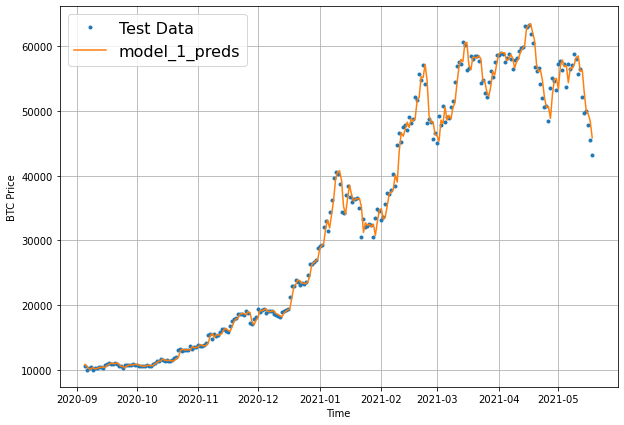

In [92]:
offset = 300
plt.figure(figsize = (10,7))

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start = offset, label = "Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values = model_1_preds,
                 start = offset,
                 format = "-",
                 label = "model_1_preds")


## Model 2: Dense(window = 30, horizon = 1)

In [93]:
HORIZON = 1
WINDOW_SIZE = 30

In [94]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)

In [95]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(windows = full_windows,
                                                                               labels =  full_labels,
                                                                               test_split = 0.2)

In [111]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = "model_2_dense")

model_2.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            batch_size = 128,
            epochs = 100,
            verbose =0,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

In [112]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1300.1523


1300.15234375

In [113]:
model_2 = tf.keras.models.load_model('model_experiment/model_2_dense/')
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1237.5063


1237.50634765625

In [114]:
model_2_preds = make_preds(model_2,
                           input_data = test_windows)

In [115]:
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_2_preds)


In [116]:
model_2_results

{'mae': array([ 513.6056  ,  355.08328 ,  327.17075 ,  358.5106  ,  420.53293 ,
         537.854   ,  545.6617  ,  485.9228  ,  584.49713 ,  687.38214 ,
         836.2264  ,  755.1576  ,  731.4957  ,  775.3399  ,  567.95544 ,
         266.80865 ,  188.80217 ,  188.10805 ,  253.095   ,  301.43256 ,
         151.10721 ,  196.8148  ,  191.46178 ,  231.65031 ,  143.61125 ,
         122.59089 ,  132.78871 ,  190.81174 ,  179.15994 ,  228.26004 ,
         314.44022 ,  379.09235 ,  278.32526 ,  295.34702 ,  299.3852  ,
         248.64983 ,  299.75668 ,  259.69434 ,  180.30531 ,  206.72922 ,
         374.62863 ,  144.85086 ,  142.33635 ,  131.11613 ,   93.9412  ,
          54.825542,   73.79555 ,  103.60121 ,  121.333916,  168.67278 ,
         183.90945 ,  152.25307 ,  186.57199 ,  146.91273 ,  240.42912 ,
         351.00656 ,  540.952   ,  549.1573  ,  521.2411  ,  526.8554  ,
         453.36237 ,  257.9811  ,  277.2947  ,  301.8247  ,  455.718   ,
         458.9603  ,  503.4438  ,  522.3119 

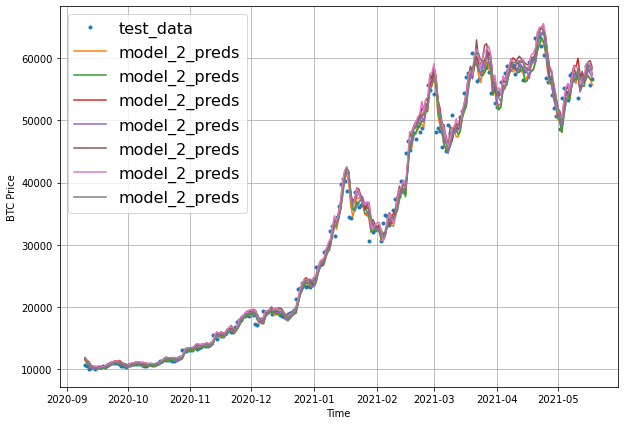

In [117]:
offset =300

plt.figure(figsize= (10,7))

plot_time_series(timesteps= X_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start = offset,
                 label = "test_data")

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = model_2_preds,
                 start = offset,
                 format = "-",
                 label = "model_2_preds")

## model 3 : Dense(window =30, horizon = 7)

In [118]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows,full_labels = make_windows(prices, window_size= WINDOW_SIZE , horizon =  HORIZON)

In [119]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(windows = full_windows,
                                                                               labels = full_labels)

In [121]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
],name = 'model_3_dense')

model_3.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size= 128,
            epochs =100,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)])


Epoch 1/100
18/18 [==============================] - 1s 32ms/step - loss: 1476.6752 - val_loss: 3088.5613
Epoch 2/100
18/18 [==============================] - 0s 25ms/step - loss: 552.8943 - val_loss: 2462.4548
Epoch 3/100
18/18 [==============================] - 0s 24ms/step - loss: 435.1978 - val_loss: 2283.1484
Epoch 4/100
18/18 [==============================] - 0s 24ms/step - loss: 391.9787 - val_loss: 1975.1218
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 357.9485 - val_loss: 2000.1556
Epoch 6/100
18/18 [==============================] - 0s 25ms/step - loss: 332.6704 - val_loss: 1723.4186
Epoch 7/100
18/18 [==============================] - 0s 25ms/step - loss: 309.9903 - val_loss: 1591.9688
Epoch 8/100
18/18 [==============================] - 0s 24ms/step - loss: 302.4123 - val_loss: 1579.8518
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 293.9170 - val_loss: 1602.9116
Epoch 10/100
18/18 [==============================] - 0s

In [122]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1300.1525


1300.1524658203125

In [123]:
model_3 = tf.keras.models.load_model('model_experiment/model_3_dense/')
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1237.5065


1237.5064697265625

In [125]:
model_3_preds = make_preds(model_3,
                           input_data = test_windows)

model_3_preds[:3]

<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[9004.694 , 9048.1   , 9425.09  , 9258.256 , 9495.797 , 9558.453 ,
        9357.3545],
       [8735.506 , 8840.303 , 9247.793 , 8885.601 , 9097.186 , 9174.327 ,
        9156.818 ],
       [8672.508 , 8782.387 , 9123.857 , 8770.371 , 9007.13  , 9003.869 ,
        9042.725 ]], dtype=float32)>

In [131]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred =  model_3_preds)

model_3_results

{'mae': array([ 513.6056  ,  355.08328 ,  327.17075 ,  358.5106  ,  420.53305 ,
         537.854   ,  545.6617  ,  485.9228  ,  584.49713 ,  687.38214 ,
         836.2264  ,  755.1577  ,  731.4957  ,  775.3399  ,  567.95544 ,
         266.80865 ,  188.80217 ,  188.10799 ,  253.095   ,  301.43256 ,
         151.10721 ,  196.81473 ,  191.46178 ,  231.65031 ,  143.61125 ,
         122.59089 ,  132.78879 ,  190.8118  ,  179.15994 ,  228.26018 ,
         314.44022 ,  379.09244 ,  278.32526 ,  295.3471  ,  299.3852  ,
         248.64983 ,  299.75662 ,  259.69434 ,  180.30531 ,  206.72922 ,
         374.62863 ,  144.85086 ,  142.33635 ,  131.11613 ,   93.9412  ,
          54.825542,   73.79548 ,  103.60128 ,  121.333916,  168.67278 ,
         183.90945 ,  152.25307 ,  186.57199 ,  146.91267 ,  240.42912 ,
         351.00662 ,  540.952   ,  549.1573  ,  521.2411  ,  526.8554  ,
         453.36237 ,  257.98102 ,  277.29486 ,  301.8247  ,  455.718   ,
         458.96017 ,  503.4438  ,  522.3119 

## make our evaluation function work for larger horizons

In [132]:
tf.reduce_mean(model_3_results['mae']).numpy()

1237.5063

In [133]:
def evaluate_preds(y_true,y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype= tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mae)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)

  if mae.ndim >0:
    mae = tf.reduce_mean(mae)
    mse =tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return{'mae':mae.numpy(),
         'mse':mse.numpy(),
         'rmse':rmse.numpy(),
         'mape':mape.numpy(),
         'mase': mase.numpy()}

In [135]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)
model_3_results

{'mae': 1237.5063,
 'mse': 5405198.5,
 'rmse': 29.735102,
 'mape': 5.5588784,
 'mase': 2.2020733}

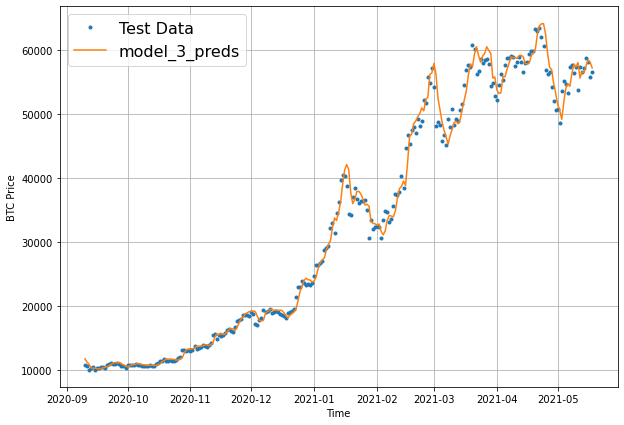

In [143]:
offset = 300

plt.figure(figsize = (10,7))

plot_time_series(timesteps = X_test[-len(test_windows):], values = test_labels[:,0], start = offset, label = 'Test Data')

plot_time_series(timesteps =X_test[-len(test_windows):], values = tf.reduce_mean(model_3_preds, axis=1) ,start = offset,format='-', label = 'model_3_preds' )